Import Libraries

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Read in sheets of xlsx file

In [3]:
df1 = pd.read_excel('data/Muesli Project raw data.xlsx', 0, header=1)
df2 = pd.read_excel('data/Muesli Project raw data.xlsx', 1, header=0)
df3 = pd.read_excel('data/Muesli Project raw data.xlsx', 2, header=0)
df4 = pd.read_excel('data/Muesli Project raw data.xlsx', 3, header=0)

In [4]:
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()
df3.columns = df3.columns.str.lower()
df4.columns = df4.columns.str.lower()

In [5]:
df1.columns = df1.columns.str.replace(' ', '_')
df2.columns = df2.columns.str.replace(' ', '_')
df3.columns = df3.columns.str.replace(' ', '_')
df4.columns = df4.columns.str.replace(' ', '_')

Understand your data

In [6]:
df1.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.0,3.3000
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.0,6.1512


In [7]:
print(df1.origin_channel.unique())
print(df1['country/region'].unique())
print(df1.quantity.max())

['Email' 'Sales' 'Facebook']
['United States']
14


In [8]:
df2.head()

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron
2,CA-2019-130001,2019-05-03,Heather Kirkland
3,CA-2019-113061,2019-05-06,Ed Ludwig
4,CA-2019-162138,2019-05-06,Grace Kelly


In [9]:
df3.head()

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,4920,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,8605,US-2019-116365,2019-01-03,2019-01-09,Standard Processing


In [10]:
df4.head()

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04
3,CA-2019-129630,2019-09-04,2019-09-04
4,CA-2019-106278,2019-09-05,2019-09-06


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           9994 non-null   int64         
 1   order_id        9994 non-null   object        
 2   order_date      9994 non-null   datetime64[ns]
 3   ship_mode       9994 non-null   object        
 4   customer_id     9994 non-null   object        
 5   customer_name   9994 non-null   object        
 6   origin_channel  9994 non-null   object        
 7   country/region  9994 non-null   object        
 8   city            9994 non-null   object        
 9   state           9994 non-null   object        
 10  postal_code     9983 non-null   float64       
 11  region          9994 non-null   object        
 12  category        9994 non-null   object        
 13  sub-category    9994 non-null   object        
 14  product_id      9994 non-null   object        
 15  sale

In [12]:
print(df1.order_date.min())
print(df1.order_date.max())

2017-01-03 00:00:00
2020-12-30 00:00:00


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           333 non-null    object        
 1   arrival_scan_date  333 non-null    datetime64[ns]
 2   customer_name      333 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 7.9+ KB


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   row_id              5899 non-null   int64         
 1   order_id            5899 non-null   object        
 2   order_date          5899 non-null   datetime64[ns]
 3   on_truck_scan_date  5899 non-null   datetime64[ns]
 4   ship_mode           5899 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 230.6+ KB


In [15]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            290 non-null    object        
 1   ready_to_ship_date  290 non-null    datetime64[ns]
 2   pickup_date         290 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.9+ KB


Clean your data

In [16]:
df1['order_id'].duplicated().value_counts()

# one order can contain several products

False    5009
True     4985
Name: order_id, dtype: int64

In [17]:
df1.drop(columns=['index', 'customer_id', 'customer_name', 'country/region', 'postal_code',
 'region', 'category', 'sub-category', 'product_id', 'sales', 'discount', 'profit'], inplace=True)

df1.head()

,order_id,order_date,ship_mode,origin_channel,city,state,quantity
0,CA-2019-121755,2019-01-16,Second Class,Email,Los Angeles,California,3
1,CA-2019-118255,2019-03-11,First Class,Sales,Eagan,Minnesota,2
2,CA-2019-169194,2019-06-20,Standard Class,Email,Dover,Delaware,3
3,CA-2019-111682,2019-06-17,First Class,Email,Troy,New York,2
4,CA-2018-135545,2018-11-24,Standard Class,Email,Los Angeles,California,2


In [18]:
df1.order_id.count()

9994

In [19]:
df2.drop(columns='customer_name', inplace=True)

df2.head()

,order_id,arrival_scan_date
0,CA-2019-109666,2019-05-03
1,CA-2019-138933,2019-05-03
2,CA-2019-130001,2019-05-03
3,CA-2019-113061,2019-05-06
4,CA-2019-162138,2019-05-06


In [20]:
df2['order_id'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
328    False
329    False
330    False
331    False
332    False
Name: order_id, Length: 333, dtype: bool

In [21]:
df2.order_id.count()

333

In [22]:
df3.drop(columns='row_id', inplace=True)

df3.head()

,order_id,order_date,on_truck_scan_date,ship_mode
0,CA-2019-125206,2019-01-03,2019-01-07,Express
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,US-2019-116365,2019-01-03,2019-01-09,Standard Processing


In [23]:
df3.drop_duplicates(keep='first', inplace=True)

In [24]:
df3.shape
#df3.order_id.count()

(3003, 4)

In [25]:
df4.drop(columns='pickup_date', inplace=True)

df4.head()

,order_id,ready_to_ship_date
0,CA-2019-116540,2019-09-02
1,CA-2019-116540,2019-09-02
2,CA-2019-129847,2019-09-04
3,CA-2019-129630,2019-09-04
4,CA-2019-106278,2019-09-05


In [26]:
df4.drop_duplicates(keep='first', inplace=True)

In [27]:
df4.order_id.count()

204

Combine dataframes

df1: Orders including date and types and contents of order <br>
df3: time from order date to on truck scan <br>
df4: time from ready to ship to pickup (express vs regular) <br>
df2: QR scan date, arrival date at the customer <br>

In [28]:
order_ready_truck = pd.merge(df3, df4, how='left', on='order_id', sort=False)
order_ready_truck.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT


In [29]:
order_ready_truck.order_id.count()

3003

In [30]:
order_arrival = pd.merge(order_ready_truck, df2, how='left', on='order_id', sort=False)
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT


In [31]:
order_arrival.count()

order_id              3003
order_date            3003
on_truck_scan_date    3003
ship_mode             3003
ready_to_ship_date     204
arrival_scan_date      333
dtype: int64

In [32]:
order_arrival['order_weekday'] = order_arrival['order_date'].dt.dayofweek # dayofweek means weekdays, 0=Monday, 6=Sunday
order_arrival.head(15)

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4
5,CA-2019-134474,2019-01-05,2019-01-11,Standard Processing,NaT,NaT,5
6,US-2019-164630,2019-01-04,2019-01-11,Standard Processing,NaT,NaT,4
7,CA-2019-158806,2019-01-07,2019-01-14,Standard Processing,NaT,NaT,0
8,CA-2019-140746,2019-01-15,2019-01-16,Express,NaT,NaT,1
9,CA-2019-126543,2019-01-09,2019-01-16,Standard Processing,NaT,NaT,2


In [33]:
#weekday = {
#    0:'Monday',
#    1:'Tuesday',
#    2:'Wednesday',
#    3:'Thursday',
#    4:'Friday',
#    5:'Saturday',
#    6:'Sunday'
#    }

In [34]:
#order_arrival['order_day'] = order_arrival['order_weekday'].map(weekday)
#order_arrival.head()

In [35]:
#order_arrival.drop(columns='order_weekday', inplace=True)
#order_arrival.head()

Data augmentation + KPIs

In [36]:
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4


In [37]:
order_arrival['order_to_ready'] = order_arrival['ready_to_ship_date'] - order_arrival['order_date']
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,order_to_ready
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3,NaT
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2,NaT
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaT
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaT
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4,NaT


In [38]:
print(order_arrival.order_to_ready.describe())
print(order_arrival.order_to_ready.info())

count                          204
mean     4 days 04:14:07.058823529
std      1 days 23:16:29.025426269
min                0 days 00:00:00
25%                3 days 00:00:00
50%                4 days 00:00:00
75%                6 days 00:00:00
max                8 days 00:00:00
Name: order_to_ready, dtype: object
<class 'pandas.core.series.Series'>
Int64Index: 3003 entries, 0 to 3002
Series name: order_to_ready
Non-Null Count  Dtype          
--------------  -----          
204 non-null    timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 46.9 KB
None


In [39]:
order_arrival['time_to_ship'] = order_arrival['on_truck_scan_date'] - order_arrival['order_date']
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,order_to_ready,time_to_ship
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3,NaT,4 days
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2,NaT,7 days
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaT,6 days
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaT,6 days
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4,NaT,5 days


In [40]:
order_arrival['time_to_ship'].info()

<class 'pandas.core.series.Series'>
Int64Index: 3003 entries, 0 to 3002
Series name: time_to_ship
Non-Null Count  Dtype          
--------------  -----          
3003 non-null   timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 46.9 KB


In [41]:
df_merged = order_arrival.copy()
df_merged.shape

(3003, 9)

In [42]:
order_arrival['ordertoready'] = order_arrival['order_to_ready'].apply(lambda x: x.days)
order_arrival.drop(columns='order_to_ready', inplace=True)
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,time_to_ship,ordertoready
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3,4 days,NaN
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2,7 days,NaN
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,6 days,NaN
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,6 days,NaN
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4,5 days,NaN


In [43]:
#orderarrival_sub1 = order_arrival.sort_values('ordertoready')[order_arrival['ordertoready'] >= 1]
#orderarrival_sub1.head()

In [44]:
#print(order_arrival.time_to_ship.describe())
#print(order_arrival.time_to_ship.info())

In [45]:
order_arrival['timetoship'] = order_arrival['time_to_ship'].apply(lambda x: x.days)
order_arrival.drop(columns='time_to_ship', inplace=True)
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3,NaN,4
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2,NaN,7
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4,NaN,5


In [46]:
#orderarrival_sub2 = order_arrival.sort_values('timetoship')[order_arrival['timetoship'] >= 1]
#orderarrival_sub2.head()

In [47]:
order_arrival['transit_time'] = order_arrival['arrival_scan_date'] - order_arrival['on_truck_scan_date']
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship,transit_time
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3,NaN,4,NaT
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2,NaN,7,NaT
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6,NaT
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6,NaT
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4,NaN,5,NaT


In [48]:
#print(order_arrival.transit_time.describe())
#print(order_arrival.transit_time.info())

In [49]:
order_arrival['transittime'] = order_arrival['transit_time'].apply(lambda x: x.days)
order_arrival.drop(columns='transit_time', inplace=True)
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship,transittime
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3,NaN,4,NaN
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2,NaN,7,NaN
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6,NaN
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6,NaN
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4,NaN,5,NaN


In [50]:
#orderarrival_sub3 = order_arrival.sort_values('transittime')[order_arrival['transittime'] >= 1]
#orderarrival_sub3.head()

Ploting

In [51]:
# plt.figure(figsize =(5, 5))
# plt.boxplot(x = order_arrival['ordertoready'])

In [52]:
# plt.figure(figsize =(5, 5))
# plt.boxplot(x = order_arrival['timetoship'])

In [53]:
# plt.figure(figsize =(5, 5))
# plt.boxplot(x = order_arrival['transittime'])

In [54]:
Standard_Realization_Time = {0: 4, 1: 3, 2: 5, 3: 6, 4: 5, 5: 4, 6: 3}
Express_Realization_time = {0: 2, 1: 3, 2: 2, 3: 4, 4: 5, 5: 4, 6: 3}

In [55]:
df_merged = order_arrival.copy()

In [56]:
df_merged.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship,transittime
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3,NaN,4,NaN
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2,NaN,7,NaN
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6,NaN
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6,NaN
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4,NaN,5,NaN


In [57]:
df_merged["ship_mode"].nunique()

2

In [58]:
df_merged_standard = df_merged[df_merged["ship_mode"] == "Standard Processing"]
df_merged_standard.shape

(2340, 10)

In [59]:
df_merged_express = df_merged[df_merged["ship_mode"] == "Express"]
df_merged_express.shape

(663, 10)

In [60]:
df_merged_standard["expected_order_truck_time"] =  df_merged_standard['order_weekday'].map(Standard_Realization_Time)


/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_2625/2076152214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_standard["expected_order_truck_time"] =  df_merged_standard['order_weekday'].map(Standard_Realization_Time)


In [61]:
df_merged_express["expected_order_truck_time"] =  df_merged_express['order_weekday'].map(Express_Realization_time )

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_2625/2721915485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_express["expected_order_truck_time"] =  df_merged_express['order_weekday'].map(Express_Realization_time )


In [62]:
df_merged_standard['shipped_on_time'] = df_merged_standard['timetoship'] - df_merged_standard['expected_order_truck_time']
df_merged_standard['shipped_on_time_y/n'] = df_merged_standard['shipped_on_time'].apply(lambda x: 'yes' if x <= 0 else 'no')

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_2625/497231312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_standard['shipped_on_time'] = df_merged_standard['timetoship'] - df_merged_standard['expected_order_truck_time']
/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_2625/497231312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_standard['shipped_on_time_y/n'] = df_merged_standard['shipped_on_time'].apply(lambda x: 'yes' if x <= 0 else 'no')


In [63]:
df_merged_express['shipped_on_time'] = df_merged_express['timetoship'] - df_merged_express['expected_order_truck_time']
df_merged_express['shipped_on_time_y/n'] = df_merged_express['shipped_on_time'].apply(lambda x: 'yes' if x <= 0 else 'no')

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_2625/3891628208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_express['shipped_on_time'] = df_merged_express['timetoship'] - df_merged_express['expected_order_truck_time']
/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_2625/3891628208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_express['shipped_on_time_y/n'] = df_merged_express['shipped_on_time'].apply(lambda x: 'yes' if x <= 0 else 'no')


In [64]:
df_merged_standard.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship,transittime,expected_order_truck_time,shipped_on_time,shipped_on_time_y/n
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2,NaN,7,NaN,5,2,no
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6,NaN,6,0,yes
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6,NaN,6,0,yes
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4,NaN,5,NaN,5,0,yes
5,CA-2019-134474,2019-01-05,2019-01-11,Standard Processing,NaT,NaT,5,NaN,6,NaN,4,2,no


In [65]:
df_std_gp_day = df_merged_standard.groupby('order_weekday').mean()['timetoship']

df_std_gp_day

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_2625/3651673948.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_std_gp_day = df_merged_standard.groupby('order_weekday').mean()['timetoship']


order_weekday
0    7.665835
1    7.406404
2    7.012225
3    6.461722
4    6.294643
5    6.231884
6    8.491379
Name: timetoship, dtype: float64

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_2625/1749998005.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_merged_standard


TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

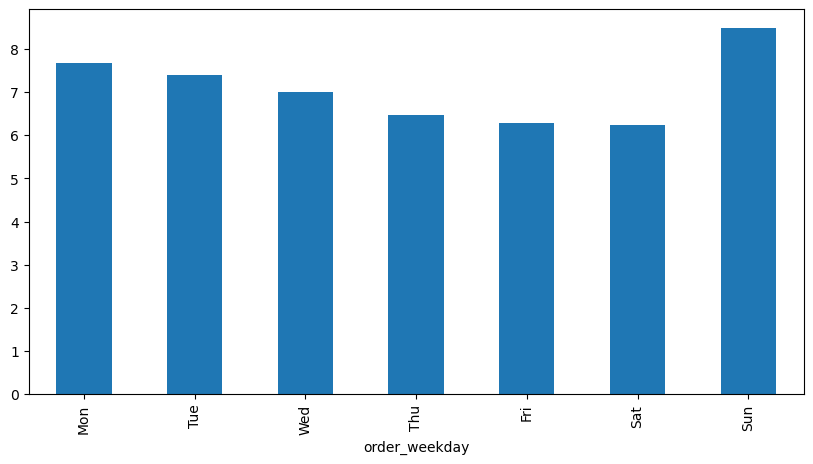

In [76]:
fig, ax = plt.subplots(figsize=(10,5))
(
    df_merged_standard
   .groupby('order_weekday') # aggregate data to level of airline
   .mean()['timetoship'] # count the observations
  .plot.bar() # Make a bar chart based on the dataframe
)

ax.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

ax.bar()

<AxesSubplot: xlabel='shipped_on_time_y/n', ylabel='count'>

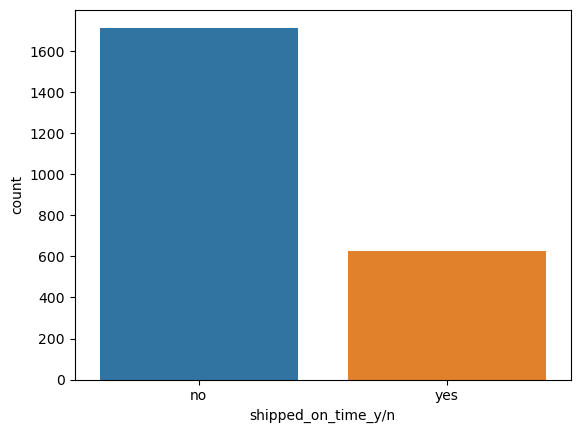

In [ ]:
sns.countplot(x=df_merged_standard['shipped_on_time_y/n'])

<AxesSubplot: xlabel='shipped_on_time_y/n', ylabel='count'>

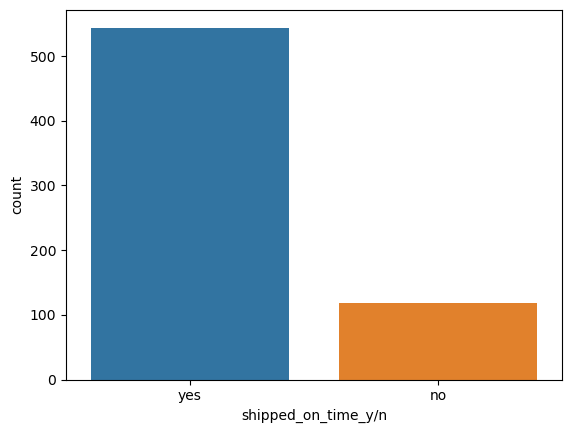

In [77]:
sns.countplot(x=df_merged_express['shipped_on_time_y/n'])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

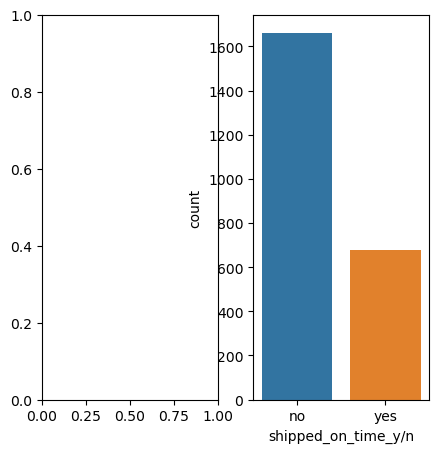

In [84]:
fig, ax = plt.subplots(1,2, figsize=(5,5))

ax[0,0] = sns.countplot(x=df_merged_standard['shipped_on_time_y/n'])
ax[0,1] = sns.countplot(x=df_merged_express['shipped_on_time_y/n'])

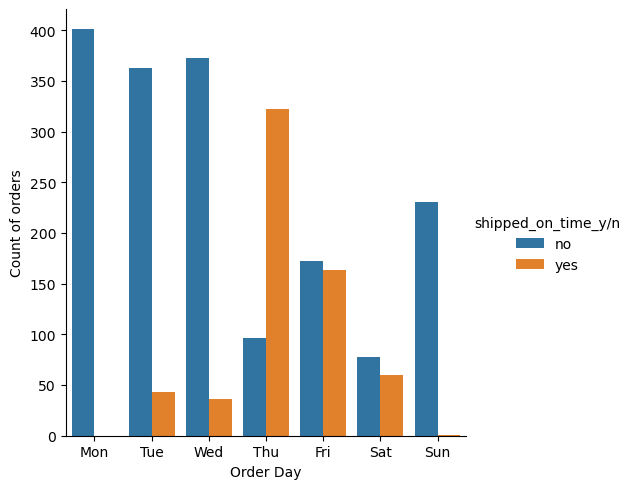

In [ ]:
g = sns.catplot(x='order_weekday',hue='shipped_on_time_y/n', data=df_merged_standard, kind='count')
g.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
g.set_titles("Standard Processing Orders Shipping")
g.set_xlabels('Order Day')
g.set_ylabels('Count of orders')

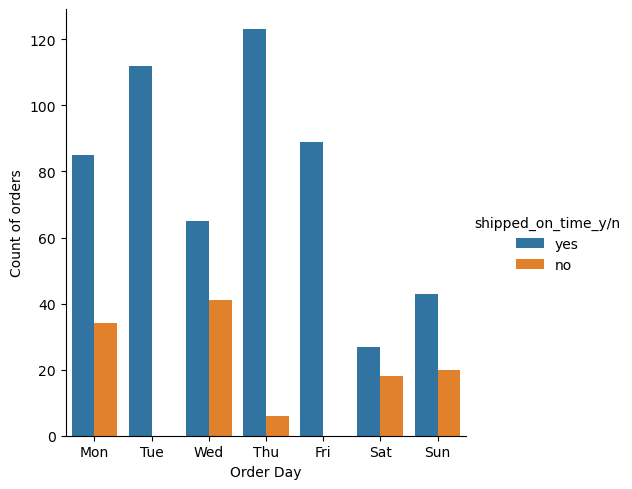

In [78]:
g = sns.catplot(x='order_weekday',hue='shipped_on_time_y/n', data=df_merged_express, kind='count')
g.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
g.set_titles("Express Processing Orders Shipping")
g.set_xlabels('Order Day')
g.set_ylabels('Count of orders')